# Home assignment 4. Diffusion generative models

Author: Alexander kolesov

<img src="https://go2phystech.ru/wp-content/uploads/2021/02/skolteh.jpeg" width=800 height=200 />

### Important information

$\textbf{Deadline}$: 23:59:59, 8 November 2023 (Friday)\
$\textbf{Rules}$:
- Do not redistribure materials of this homework, they belong to Skoltech.
- This is your individual work. Please, do not consult with the other students and do not copy their work. Otherwise, you will get 0 points.
- Please, respect the homework deadlines!
- This HW is composed of 2 tasks with the corresponding points: task 1 - 3 pts, task 2 - 7 pts. Overall, 10 points.
- We have created a special telegram topic for this homework 4. There you can questions if anything is unclear. However, please do not post your solution or ask for it in the subgroup's messages, otherwise, you will get 0 points.
- After the grades are posted, you will have one week to appeal (offline, on campus).


## Task 1. Bayes Theorem for Diffusion models (3 points)

During the last seminar, we defined iterative forward process as:

$$ x_{t} = \sqrt{1 - \beta}x_{t-1} + \sqrt{\beta}\epsilon  $$

Moreover, we pointed out one useful property of this process. Namely, that one can represent a sample at time  $t$ via initial sample with the following denotion of $\overline{\alpha}_{t} = \prod_{s=1}^{t}(1 - \beta_{s})$:

$$ x_{t} = \sqrt{\overline{\alpha}_{t}}x_{0} + \sqrt{1 - \overline{\alpha}_{t}}\epsilon $$

Thus, this formula helps to define conditional probability distribution for arbitrary time $t$:

$$ q(x_{t}|x_{0}) = \mathcal{N}(x_{t}|\sqrt{\overline{\alpha}_{t}}x_{0}, (1 - \overline{\alpha}_{t})I)$$

In order to provide optimization of corresponding KL-divergences, we should reverse this chain by $\textbf{bayes Theorem}$

$$ q(x_{t-1}|x_{t},x_{0}) = \frac{q(x_{t}|x_{t-1},x_{0})q(x_{t-1}|x_{0})}{q(x_{t}|x_{0})}$$



Your task is to provide $\textbf{full and understandable}$ derivation of mean and deviation of distribution $ q(x_{t-1}|x_{t},x_{0}) $

\begin{gather*}
q(x_{t-1}|x_{t},x_{0}) = \frac{q(x_{t}|x_{t-1},x_{0})q(x_{t-1}|x_{0})}{q(x_{t}|x_{0})} =
\frac{\mathcal{N}(x_{t}|\sqrt{\alpha_{t}}x_{t-1}, (1 - \alpha_{t})I) \mathcal{N}(x_{t - 1}|\sqrt{\overline{\alpha}_{t - 1}}x_{0}, (1 - \overline{\alpha}_{t - 1})I)}{\mathcal{N}(x_{t}|\sqrt{\overline{\alpha}_{t}}x_{0}, (1 - \overline{\alpha}_{t})I)} \\ \propto \exp \left( -\left[\frac{(x_t - \sqrt{\alpha_t}x_{t-1})^2}{2(1-\alpha_t)} + \frac{(x_{t-1} - \sqrt{\overline{\alpha}_{t-1}}x_{0})^2}{2(1-\overline{\alpha}_{t-1})} - \frac{(x_{t} - \sqrt{\overline{\alpha}_{t}}x_{0})^2}{2(1-\overline{\alpha}_{t})} \right]\right) \\
\propto \exp \left( - \frac{1}{2} \left[ \frac{-2\sqrt{\alpha_t}x_tx_{t-1} + \alpha_t x_{t-1}^2}{1-\alpha_t} + \frac{-2\sqrt{\overline{\alpha}_{t-1}}x_0 x_{t-1} + x_{t-1}^2}{1-\overline{\alpha}_{t-1}} \right]\right) = \\
= \exp \left( - \frac{1}{2} \left[ \left( \frac{\alpha_t}{1 - \alpha_t} + \frac{1}{1-\overline{\alpha}_{t-1}} \right) x^2_{t-1} - \left( \frac{2\sqrt{\alpha_t}x_t}{1-\alpha_t} + \frac{2\sqrt{\overline{\alpha}_{t-1}}x_0}{1-\overline{\alpha}_{t-1}} \right) x_{t-1} \right]\right) = \\
= \exp \left( - \frac{1}{2} \left[ \left( \frac{1 -\overline{\alpha}_{t}}{(1-\overline{\alpha}_{t-1}) (1 - \alpha_t)} \right) x^2_{t-1} - 2\left(\frac{(1-\alpha_t)\sqrt{\overline{\alpha}_{t-1}}x_0 + (1-\overline{\alpha}_{t-1})\sqrt{\alpha_t}x_t}{(1-\alpha_t)(1-\overline{\alpha}_{t-1})} \right) x_{t-1} \right]\right) = \\
= \exp \left( - \frac{1}{2} \left( \frac{1 -\overline{\alpha}_{t}}{(1-\overline{\alpha}_{t-1}) (1 - \alpha_t)} \right) \left[ x^2_{t-1} - 2\left(\frac{(1-\alpha_t)\sqrt{\overline{\alpha}_{t-1}}x_0 + (1-\overline{\alpha}_{t-1})\sqrt{\alpha_t}x_t}{1-\overline{\alpha}_{t}} \right) x_{t-1} \right]\right) \propto \\
\mathcal{N}\left(x_{t-1} \bigg| \frac{(1-\alpha_t)\sqrt{\overline{\alpha}_{t-1}}x_0 + (1-\overline{\alpha}_{t-1})\sqrt{\alpha_t}x_t}{1-\overline{\alpha}_{t}}, \frac{(1-\overline{\alpha}_{t-1}) (1 - \alpha_t)}{1 -\overline{\alpha}_{t}} I \right)
\end{gather*}

## Task 2. Velocity parametrization for diffusion models (7 points)

In this task, you will learn your first diffusion model for generating cute butterflies. Also, you will learn about the library $\textbf{Diffusers}$, that is fundament for more difficult applications of neural networks.


![diffusers_library](https://github.com/huggingface/diffusers/raw/main/docs/source/en/imgs/diffusers_library.jpg)

### Before Task

Before this task, you should create an account on Hugging Face Hub.If you haven't done it yet, you can do it here: https://huggingface.co/join

### 2.1 Installation

Run the following cell to install the diffusers library, as well as several other necessary components:

In [1]:
!pip install -qq -U diffusers datasets transformers accelerate ftfy pyarrow==9.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.2 MB/s eta 0:00:00



Then follow the link https://huggingface.co/settings/tokens and create an access token with read/write permission, if you don't have it yet:

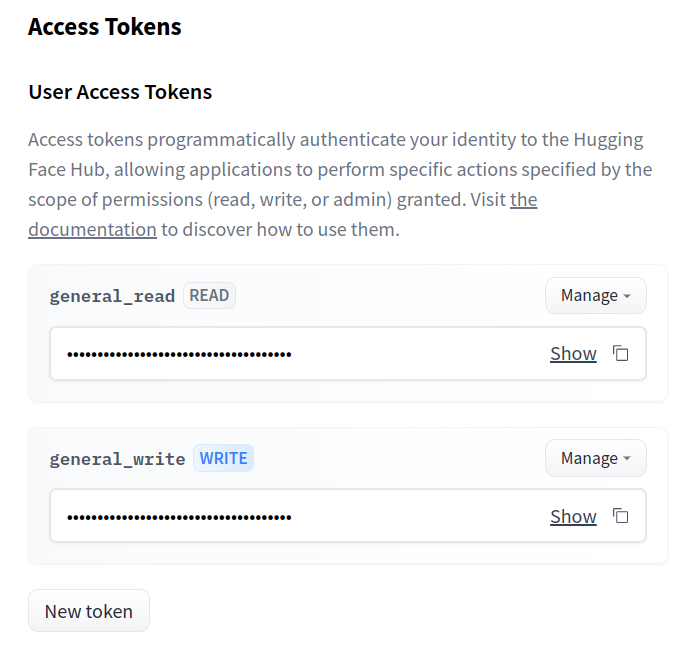

You can log in with this token using the command line (`huggingface-cli login`) or by executing the following cell:

In [2]:
from huggingface_hub import notebook_login

notebook_login()

And finally, let's import the libraries that we will use and define a few helper functions that we will use later in the notebook.:

In [3]:
import numpy as np
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
from PIL import Image
from torchvision.transforms import ToPILImage

def show_images(x, padding=0):
    """Given a batch of images x, make a grid and convert to PIL"""
    x = x * 0.5 + 0.5  # Map from (-1, 1) back to (0, 1)
    grid = torchvision.utils.make_grid(x, padding=padding)
    grid_im = grid.detach().cpu().permute(1, 2, 0).clip(0, 1) * 255
    grid_im = Image.fromarray(np.array(grid_im).astype(np.uint8))
    return grid_im


def image_grid(imgs, rows, cols, scale=2):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*int(w*scale), rows*int(h*scale)))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img.resize((int(w*scale), int(h*scale))),
                   box=(i%cols*int(w*scale), i//cols*int(h*scale)))
    return grid

topil = lambda x: ToPILImage()(x.mul(0.5).add(0.5).clip(0, 1))

# Mac users may need device = 'mps' (untested)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

We are ready to start

model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/133 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/692 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

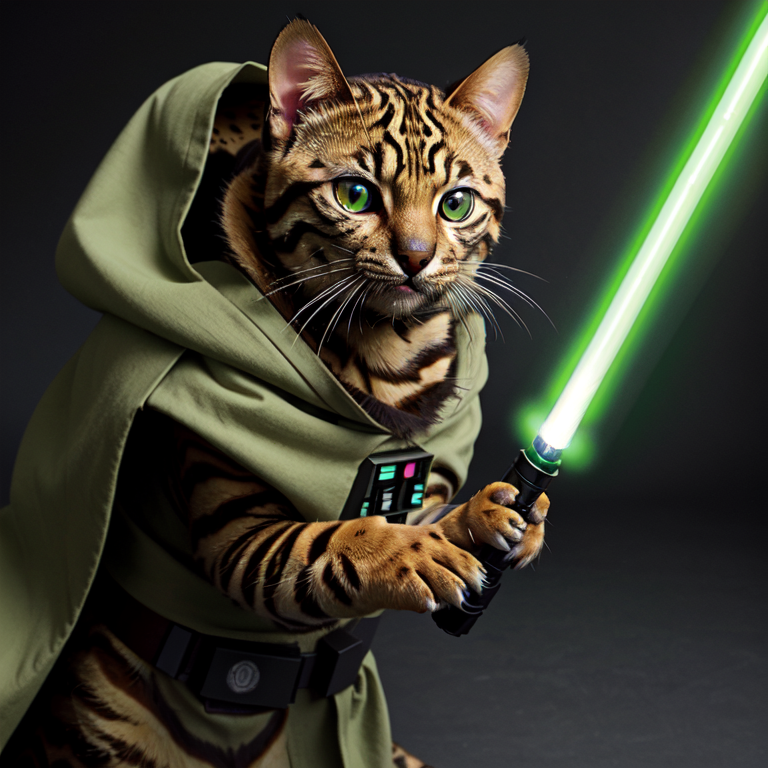

In [4]:
from diffusers import DiffusionPipeline

# Load the custom stable diffusion fine-tuned checkpoint
custom_pipeline = DiffusionPipeline.from_pretrained(
    "Yntec/epiCPhotoGasm", torch_dtype=torch.float16,
).to(device)

prompt = 'a master jedi bengal cat in star wars holding a green lightsaber in its paws, wearing a jedi cloak hood'

# Create an image
torch.cuda.manual_seed(0)
generated_images = custom_pipeline(prompt=prompt).images

# View the result
generated_images[0]

### 2.2 Pipelines

## Minimal pipeline

Base API 🤗 Diffusers is divided to 3 main components:

1. **Pipelines**: High-level classes designed to quickly create samples from popular trained diffusion models in a user-friendly form.
2. **Models**:  popular architectures for teaching new diffusion models, for example, UNet.
3. **Schedulers**: various techniques for generating images from noise during output, as well as for creating noisy images for training.

Pipelines are great for end users, but we'll figure out what's going on under the hood! So, for the rest of this notebook, we're going to create our own pipeline capable of generating small images of butterflies. Here is one of the possible final results in action:

model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors not found


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/267 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/74.3M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

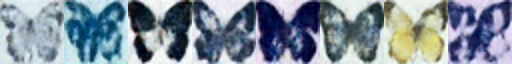

In [5]:
from diffusers import DDPMPipeline

# Load the butterfly pipeline
butterfly_pipeline = DDPMPipeline.from_pretrained(
    "johnowhitaker/ddpm-butterflies-32px"
).to(device)

# Create 8 images
generated_images = butterfly_pipeline(batch_size=8).images

# View the result
image_grid(generated_images, 1, 8)

We are learning from scratch using approximately 0.0001% of the data used to train Stable Diffusion. Speaking of learning, let us recall from the introduction to this block that the process of learning the diffusion model looks something like this:


1. Loading images from training data
2. Adding noise in various amounts.
3. Feeding noisy versions of input data into the model
4. Evaluation of how well the model copes with removing noise from these inputs
5. Using this information to update the model weights and repeat the process

We will study these steps one at a time in the next few sections until we create a complete learning cycle. Then we'll look at how to make samples from a trained model and how to pack everything into a pipeline for easy sharing. Let's start with the data...

### 2.3  Uploading a training dataset


For this example, we will use a set of images from Hugging Face Hub. Specifically, [this collection of 1000 butterfly images](https://huggingface.co/datasets/huggan/smithsonian_butterflies_subset ). This is a very small data set. If you prefer to use your own set of images, you can also use the commented out sample code to download images from a folder.

In [6]:
import torchvision
from datasets import load_dataset
from torchvision import transforms

dataset = load_dataset("huggan/smithsonian_butterflies_subset", split="train")

# Or load images from a local folder
# dataset = load_dataset("imagefolder", data_dir="path/to/folder")

# We'll train on 32-pixel square images, but you can try larger sizes too
image_size = 32
# You can lower your batch size if you're running out of GPU memory
batch_size = 32

# Define data augmentations
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # Resize
        transforms.RandomHorizontalFlip(),  # Randomly flip (data augmentation)
        transforms.ToTensor(),  # Convert to tensor (0, 1)
        transforms.Normalize([0.5], [0.5]),  # Map to (-1, 1)
    ]
)

def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}


dataset.set_transform(transform)

# Create a dataloader from the dataset to serve up the transformed images in batches
train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True, drop_last=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

We can get a batch of images and view some of them as follows:

X shape: torch.Size([8, 3, 32, 32])


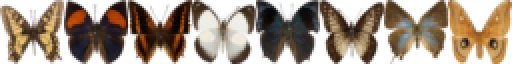

In [7]:
xb = next(iter(train_dataloader))["images"].to(device)[:8]
print("X shape:", xb.shape)
show_images(xb).resize((8 * 64, 64), resample=Image.NEAREST)

We are working with a small dataset with 32x32 pixel images to save time learning learning in this laptop.

Let's take another look at the images generated using the uploaded checkpoint and compare them with the original images.

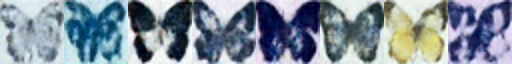

In [8]:
image_grid(generated_images, 1, 8)

### 2.3 Defining the Scheduler

Our plan for training is to take these input images and add noise to them, then feed the noisy images to the model. During the output, we will use the predictions of the model to iteratively remove noise. In `diffusers`, both of these processes are handled by the **scheduler**.

The noise schedule determines how much noise is added at different time steps. Here's how we could create a scheduler using the default settings for training and sampling 'DDPM' (based on the article ["Denoising Diffusion Probabilistic Models"] (https://arxiv.org/abs/2006.11239 )):

The DDPM article describes a process that adds a small amount of noise at each 'time step'. Given $x_{t-1}$ for some time step, we can get the next (slightly noisier) version of $x_t$ using:<br><br>

$q(\mathbf{x}_t \vert \mathbf{x}_{t-1}) = \mathcal{N}(\mathbf{x}_t; \sqrt{1 - \beta_t} \mathbf{x}_{t-1}, \beta_t\mathbf{I}) \quad
q(\mathbf{x}_{1:T} \vert \mathbf{x}_0) = \prod^T_{t=1} q(\mathbf{x}_t \vert \mathbf{x}_{t-1})$<br><br>

In other words, we take $x_{t-1}$, scale it by $\sqrt{1 -\beta_t}$ and add noise scaled by $\beta_t$. This $\beta$ is defined for each t according to some schedule and determines how much noise is added at each time step. Now we don't necessarily want to perform this operation 500 times to get $x_{500}$, so we have another formula to get $x_t$ for any t provided $x_0$: <br><br>


$\begin{aligned}
q(\mathbf{x}_t \vert \mathbf{x}_0) &=\mathcal{N}(\mathbf{x}_t; \sqrt{\bar{\alpha}_t} \mathbf{x}_0, {(1 - \bar{\alpha}_t)} \mathbf{I})
\end{aligned}$ where $\bar{\alpha}_t = \prod_{i=1}^T \alpha_i$ and $\alpha_i= 1-\beta_i$<br><br>

Mathematical notation always seems intimidating! Fortunately, the scheduler handles all this for us. We can plot $\sqrt{\bar{\alpha}_t}$(denoted as `sqrt_alpha_prod`) and $\sqrt{(1 - \bar{\alpha}_t)}$  (denoted as `sqrt_one_minus_alpha_prod`) to see how the input (x) and noise are scaled and mixed at different time steps:

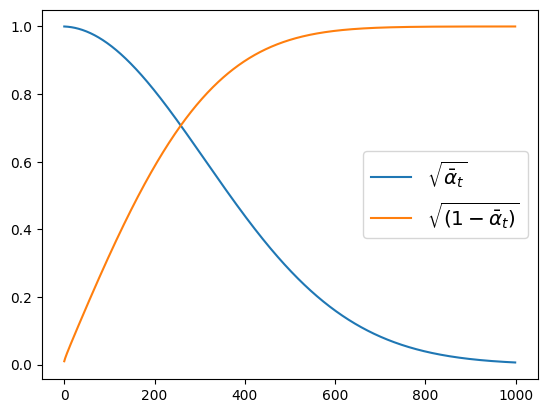

In [10]:
from diffusers import DDPMScheduler
noise_scheduler_lin = DDPMScheduler(num_train_timesteps=1000)
plt.plot(noise_scheduler_lin.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler_lin.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large");

Let's explore how this graph changes with different values of beta_start, beta_end and beta_schedule.

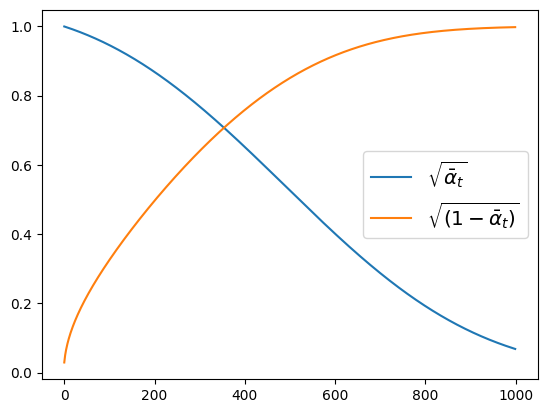

In [11]:
# Stable diffusion scheduler:
noise_scheduler_sd = DDPMScheduler(num_train_timesteps=1000, beta_schedule='scaled_linear',
                                beta_start=0.00085, beta_end=0.012)

plt.plot(noise_scheduler_sd.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler_sd.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large");

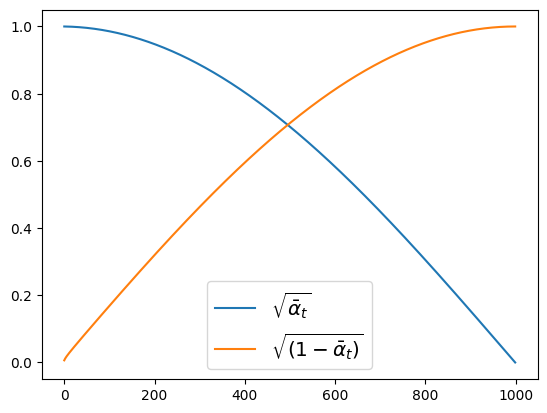

In [12]:
# The 'cosine' schedule, which may be better for small image sizes:
noise_scheduler_cos = DDPMScheduler(num_train_timesteps=1000, beta_schedule='squaredcos_cap_v2')

plt.plot(noise_scheduler_cos.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler_cos.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large");

Let's also compare the signal-to-noise ratio (SNR) for these schedulers.

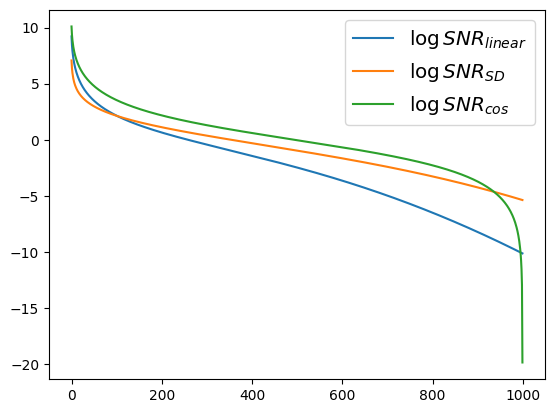

In [13]:
snr = noise_scheduler_lin.alphas_cumprod / (1 - noise_scheduler_lin.alphas_cumprod)
snr_sd = noise_scheduler_sd.alphas_cumprod / (1 - noise_scheduler_sd.alphas_cumprod)
snr_cos = noise_scheduler_cos.alphas_cumprod / (1 - noise_scheduler_cos.alphas_cumprod)

plt.plot(snr.log(), label=r"$\log{SNR}_{linear}$")
plt.plot(snr_sd.log(), label=r"$\log{SNR}_{SD}$")
plt.plot(snr_cos.log(), label=r"$\log{SNR_{cos}}$")
plt.legend(fontsize="x-large");

Note that the cosine scheduler is closest to becoming a real Gaussian noise at the last stage, while the Stable diffusion scheduler contains an error and does not achieve a real Gaussian distribution, which leads to data leakage during training and some problems with inference.

But the point here is not that the scheduler is cosine or linear, but just in the incorrect setting of the sequence $\beta_t$.

In [14]:
print(r"linear: alpha_cumprod[-1]:", noise_scheduler_lin.alphas_cumprod[-1].item())
print(r"stable diffusion: alpha_cumprod[-1]:", noise_scheduler_sd.alphas_cumprod[-1].item())
print(r"cos: alpha_cumprod[-1]:", noise_scheduler_cos.alphas_cumprod[-1].item())

linear: alpha_cumprod[-1]: 4.035830352222547e-05
stable diffusion: alpha_cumprod[-1]: 0.00466009508818388
cos: alpha_cumprod[-1]: 2.4287349909002387e-09


Whichever scheduler you choose, we can now use it to add noise in various volumes using the `noise_scheduler.add_noise` function, as shown below:


Noisy X shape torch.Size([8, 3, 32, 32])


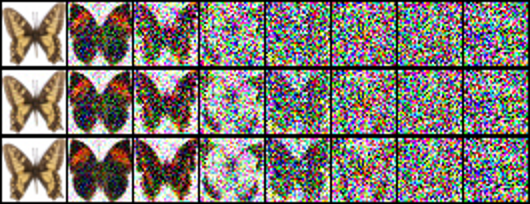

In [15]:
timesteps = torch.linspace(0, 999, 8).long().to(device)
noise = torch.randn_like(xb)

noisy_xb_lin = noise_scheduler_lin.add_noise(xb, noise, timesteps)
noisy_xb_sd = noise_scheduler_sd.add_noise(xb, noise, timesteps)
noisy_xb_cos = noise_scheduler_cos.add_noise(xb, noise, timesteps)

print("Noisy X shape", noisy_xb_lin.shape)
image_grid([
    show_images(noisy_xb_lin, padding=1),
    show_images(noisy_xb_sd, padding=1),
    show_images(noisy_xb_cos, padding=1),
], 3, 1)

one can also re-examine the effect of using different graphs and noise parameters here. [This video](https://www.youtube.com/watch?v=fbLgFrlTnGU ) perfectly explains some of the mathematical aspects in more detail and provides an excellent introduction to some of these concepts.

### 2.4  Parametrization

During the seminar, we realized that $\epsilon$ parametrization is more convenient for optimization than $x$ parametrization. Now, you read the provided paper and learn about $v$-parameterization https://arxiv.org/abs/2202.00512

Let's summarize the definition of noisy samples.

$
x_t=\sqrt{\bar{a}_t} x_0+\sqrt{1-\bar{a}_t} \epsilon
$

Predicting the added noise, $\epsilon$-parameterization, will be equivalent to optimizing the following weighted loss function:

$
L_\theta=\left\|\epsilon-\hat{\epsilon}_\theta\right\|_2^2=\frac{\bar{a}_t}{1 - \bar{a}_t}\left\|x_0-\hat{x}_{0}\right\|_2^2,
$

However, we can also define velocity - the rate of the diffusion process as follows:

$
v_t=\sqrt{\bar{\alpha}_t} \epsilon-\sqrt{1-\bar{\alpha}_t} x_0
$

Now, predicting the velocity, $v$-parameterization, we get the following expression:

$
L_\theta=\left\|v_t-\hat{v}_t\right\|_2^2=\left(1+\frac{\bar{a}_t}{1 - \bar{a}_t}\right)\left\|x_0-\hat{x}_{0}\right\|_2^2
$



Noisy images


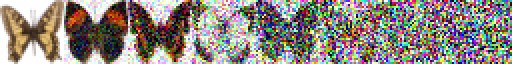

In [16]:
print('Noisy images')
show_images(noisy_xb_cos).resize((8 * 64, 64), resample=Image.NEAREST)

Noise


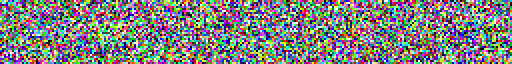

In [17]:
print('Noise')
show_images(noise).resize((8 * 64, 64), resample=Image.NEAREST)

Velocity


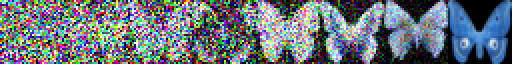

In [18]:
print('Velocity')
velocity = noise_scheduler_cos.get_velocity(xb, noise, timesteps)
show_images(velocity).resize((8 * 64, 64), resample=Image.NEAREST)

If we consider the $\epsilon$ parameterization, the penalty will be applied only for small values of the time step, while the prediction of noise at larger time steps becomes trivial (the identity function).

Meanwhile, $v_0=\epsilon$ and $v_T=-x_0$, and the penalty will be applied on "both sides", increasing the convergence rate.

Let's try this.





### 2.4 Creating our model

Now we come to the main component: the model itself.

Most diffusion models use architectures that are a variation of [U-net](https://arxiv.org/abs/1505.04597 ), and that's what we're going to use here.

![](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/unet-model.png)

In short:
- the model passes the input image through several blocks of ResNet layers, each of which reduces the image size by 2 times,
- then through the same number of blocks, which increase its size again.
- there are skip connections connecting the features on the way to reduce the size with the corresponding layers on the way to increase the size.

An important feature of this model is that it predicts images of the same size as the input ones, which is exactly what we need here.

Diffusers provides a convenient `UNet2DModel' class that creates the desired architecture in PyTorch.

Let's create a U-Net for our desired image size. Note that `down_block_types` correspond to the size reduction blocks (green in the diagram above), and `up_block_types` correspond to the size increase blocks (red in the diagram)

In [20]:
from diffusers import UNet2DModel
torch.manual_seed(0)

# Create a model
model = UNet2DModel(
    sample_size=image_size,  # the target image resolution
    in_channels=3,  # the number of input channels, 3 for RGB images
    out_channels=3,  # the number of output channels
    layers_per_block=1,  # how many ResNet layers to use per UNet block
    block_out_channels=(64, 64, 64, 128),  # More channels -> more parameters
    down_block_types=(
        "DownBlock2D",  # a regular ResNet downsampling block
        "DownBlock2D",
        "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
        "AttnDownBlock2D",
    ),
    up_block_types=(
        "AttnUpBlock2D",
        "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
        "UpBlock2D",
        "UpBlock2D",  # a regular ResNet upsampling block
    ),
)
model.to(device);

In [21]:
print("Number of parametrs:", round(sum(p.numel() for p in model.parameters()) / 1e6, 1), "M")

Number of parametrs: 3.7 M


When working with higher resolution images, it may be worth using more blocks to reduce and increase the size, and leaving the layers of attention only at the lowest resolution (lower layers) to reduce memory usage.

We can check that inputting noisy data and timesteps to our model results in the output with the same shape as the input:

In [22]:
with torch.no_grad():
    model_prediction = model(noisy_xb_cos, timesteps).sample
model_prediction.shape

torch.Size([8, 3, 32, 32])

### 2.5 Create a Learning Cycle (4 pts.)

It's time to learn! Below is a typical optimization cycle in PyTorch, where we go through the data in chunks and update the parameters of our model at each step using an optimizer - in this case, the AdamW optimizer with a learning factor of 0.0004.

For each piece of data, we:
- Choose random values of time steps
- Add noise to the data
- Input noisy data into the model
- Compare the predictions of the model with the target (that is, noise in the case of $\epsilon$ parameterization and speed in the case of $v$parameterization), using the RMS error as a loss function
- Update the model parameters via `loss.backward()` and `optimizer.step()`

During this process, we also record the values of losses over time for subsequent plotting.



### Your task
Complete the following code:
1. Make the predictions for the case of $\epsilon$ parametrization and for $v$ parametrization (**2 pts.**)
2. Calculate the loss functions for both cases and update the models' parameters with ```.backward``` (**2 pts.**)

In [23]:
from tqdm.auto import tqdm, trange
from diffusers.optimization import get_scheduler
from copy import deepcopy
import itertools

# Set the noise scheduler

noise_scheduler_eps = DDPMScheduler(
    num_train_timesteps=1000, beta_schedule="squaredcos_cap_v2", prediction_type='epsilon'
)

noise_scheduler_v = DDPMScheduler(
    num_train_timesteps=1000, beta_schedule="squaredcos_cap_v2", prediction_type='v_prediction'
)


model_eps = model
model_v = deepcopy(model)

# Training loop
optimizer = torch.optim.AdamW(itertools.chain(model_eps.parameters(), model_v.parameters()), lr=4e-4)

num_epochs = 30

lr_scheduler = get_scheduler(
        'constant_with_warmup',
        optimizer=optimizer,
        num_warmup_steps=1*len(train_dataloader),
        num_training_steps=num_epochs*len(train_dataloader),
    )

losses_eps = []
losses_v = []

progress_bar = trange(num_epochs, desc='Epoch')
for epoch in progress_bar:
    for step, batch in enumerate(tqdm(train_dataloader, leave=False)):

        clean_images = batch["images"].to(device)

        # Sample noise to add to the images
        noise = torch.randn(clean_images.shape).to(clean_images.device)
        bs = clean_images.shape[0]

        # Sample a random timestep for each image
        timesteps = torch.randint(
            0, noise_scheduler_v.config.num_train_timesteps, (bs,), device=clean_images.device
        ).long()

        # Add noise to the clean images according to the noise magnitude at each timestep
        noisy_images_eps = noise_scheduler_eps.add_noise(clean_images, noise, timesteps)
        noisy_images_v = noise_scheduler_v.add_noise(clean_images, noise, timesteps)

        # !!!(your code here) !!!
        noise_pred_eps = model_eps(noisy_images_eps, timesteps).sample
        noise_pred_v =  model_v(noisy_images_v, timesteps).sample


        # For epsilon-prediction our target is noise itself
        target_eps = noise

        # For v-prediction our target is velocity on step t
        target_v = noise_scheduler_v.get_velocity(clean_images, noise, timesteps)

        # !!!(your code here)!!! Calculate the loss and make backward
        loss_eps = F.mse_loss(noise_pred_eps, target_eps)
        loss_v =  F.mse_loss(noise_pred_v, target_v)

        loss_eps.backward()
        loss_v.backward()

        losses_eps.append(loss_eps.item())
        losses_v.append(loss_v.item())

        # Update the model parameters with the optimizer
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad(set_to_none=True)


    progress_bar.set_postfix({
        'loss_eps': sum(losses_eps[-len(train_dataloader) :]) / len(train_dataloader),
        'loss_v': sum(losses_v[-len(train_dataloader) :]) / len(train_dataloader)
    })

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

### 2.6 Sampling and covergence (3 pts.)

### Your task
1. Demonstrate that $v$ parametrization results in faster convergence than $\epsilon$ parametrization (**1 pt.**)
2. Complete the ```sample``` function (**2 pts.**)

In [ ]:
# write !!!! your code !!!! that demonstrates faster convergence of velocity-parameterization unline epsilon

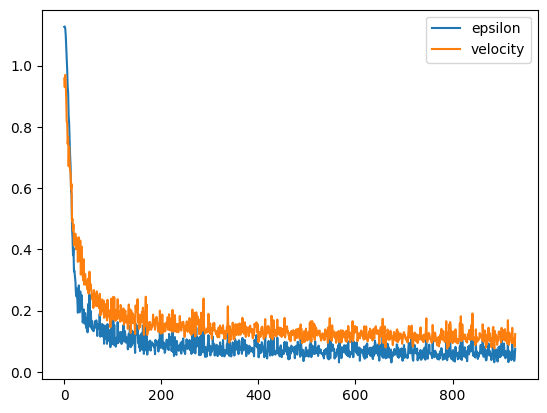

In [24]:
plt.plot(losses_eps, label='epsilon')
plt.plot(losses_v, label='velocity')
plt.legend(loc='upper right')

In [27]:
@torch.no_grad()
def sample(num, scheduler, model, num_inference_steps=1000):
  image = torch.randn((num, 3, 32, 32), device='cuda')

  # set step values
  scheduler.set_timesteps(num_inference_steps)

  for t in tqdm(scheduler.timesteps):
      # 1. predict noise model_output
      model_output = model(image, t).sample

      # 2. compute previous image: x_t -> x_t-1
      image = scheduler.step(model_output, t, image).prev_sample

  return show_images(image)


epsilon


  0%|          | 0/1000 [00:00<?, ?it/s]

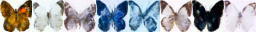

In [30]:
print('epsilon')
sample(8, noise_scheduler_eps, model_eps)

Velocity


  0%|          | 0/1000 [00:00<?, ?it/s]

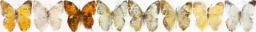

In [31]:
print('Velocity')
sample(8, noise_scheduler_v, model_v)